 <nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header">
      <a class="navbar-brand" href="_Oving10.ipynb">Øving 10</a>
    </div>
    <ul class="nav navbar-nav">
    <li ><a href="Rekursjon.ipynb">Rekursjon (Obligatorisk TDT4109)</a></li>
    <li ><a href="Matplotlib.ipynb">Matplotlib (Obligatorisk TDT4110)</a></li>
    <li ><a href="Eksamen%202012.ipynb">Eksamen Python 2012</a></li>
    <li ><a href="Sudoku.ipynb">Sudoku</a></li>
    <li ><a href="numpy-arrays%20og%20matplotlib.ipynb">Numpy-arrays og matplotlib (TDT4110)</a></li>
    <li class="active"><a href="Bokanalyse%20med%20plotting.ipynb">Bokanalyse med plotting (TDT4110)</a></li>
    <li ><a href="Sjakk.ipynb">Sjakk</a></li>
    </ul>
  </div>
</nav>


# Bokanalyse med plotting (TDT4110)

I denne oppgaven skal du analysere boken *Alice in Wonderland* og se hvor mange ganger forskjellige ord dukker opp i de forskjellige kapitlene. Dette skal vi etterhvert plotte inn i en graf ved hjelp av `matplotlib`.

Filen vi skal bruke er [alice_in_wonderland.txt](alice_in_wonderland.txt), som er hele den engelske versjonen av Alice i eventyrland i en tekstfil.

## a) Oppdeling i kapitler

I første oppgave skal du lage funksjonen `get_chapters(filename, chapter_delimiter)` som tar inn et filnavn `filename` pluss en *skillestreng* `chapter_delimiter` og returnerer en liste av strenger hvor hver streng er teksten til et kapittel i boken. Skillestrengen er en streng som befinner seg før hvert kapittel, men *ikke noe annet sted i boken*.

Forordet skal ikke være med, så den første strengen i listen som returneres skal være teksten til kapittel 1.

***Skriv koden i kodeblokken under:***

In [41]:
def get_chapters(filename, chapter_delimiter):
    r=open(filename,"r")
    chapters=r.read()
    chapters=chapters.split(chapter_delimiter)
    chapters.pop(0)
    r.close()
    return chapters

I [alice_in_wonderland.txt](alice_in_wonderland.txt) finnes strengen `'CHAPTER'` (i store bokstaver) mellom hvert kapittel, så til denne boka kan vi bruke `'CHAPTER'` som vår `chapter_delimiter`.

Har du gjort alt riktig burde output fra koden under være `12` siden Alice in Wonderland har 12 kapitler. *husk å kjøre koden med funksjonen din over først!*

In [42]:
chapters = get_chapters("alice_in_wonderland.txt", "CHAPTER")
print(len(chapters))

12


#### Hint

- Funksjonen `split` er din venn.
- Hvis din output er `13` fra testkoden, kan det hende du har tatt med teksten som kommer før 1. kapittel

## b) Telling av ord

Lag funksjonen `count_words(string_list, word)` som tar inn en liste med strenger `string_list` og et ord `word` og returnerer en ny liste med antallet ganger `word` befinner seg i hver av strengene i `string_list`. Se på eksempelet lenger ned hvis dette var uklart.

Funksjonen skal gjelde uavhengig av hvilke bokstaver som er store og små i `word` og `string_list`. 

***Skriv koden i kodeblokken under:***

In [47]:
def count_words(string_list,word):
    c_list=[]
    for string in string_list:
        string=string.lower()
        c=string.count(word.lower())
        c_list.append(c)
    return c_list

*Eksempel på bruk:*

Du kan teste om funksjonen din fungerer som den skal med koden under (men husk å kjøre kodeblokken med funksjonen din først!):

In [48]:
strengliste = ["Takpapp, veggpapp, papp og papir", "Papir, stein, saks og papir"]
count_words(strengliste, "Papir")

[1, 2]

Har du gjort alt riktig skal denne koden printe listen `[1,2]`, siden `"Takpapp, veggpapp, papp og papir"` inneholder én `"Papir"`, mens `"Papir, stein, saks og papir"` inneholder to `"Papir"`.

#### Hint

Du kan bruke den innebygde funksjonen `string.count(word)` som teller antall ganger et ord befinner seg i en streng. Dette vil nok gjøre oppgaven betydelig enklere. Test det ut med koden under:

In [ ]:
rar_setning = "Hadde jeg hatt en hatt i går ville jeg nok hatt hatt i dag også"
print(rar_setning.count("hatt"))

**Obs:** funksjonen `count` tar hensyn til store og små bokstaver, så dette må du gjøre noe med i koden din.

## c) Nummerert liste

I den neste oppgaven skal du lage funksjonen `create_numbers_to(number)` som tar inn et nummer `number` og returnerer en liste som inneholder like mange elementer som `number` på formen `[1,2,3,4..., number-1, number]`. Det høyeste (og siste) tallet i listen skal altså være `number`

For eksempel skal `create_numbers_to(7)` returnere listen `[1, 2, 3, 4, 5, 6, 7]`

***Skriv koden i kodeblokken under og test at den fungerer:***

In [49]:
def create_numbers_to(number):
    numbers=[]
    for i in range(1,number+1):
        numbers.append(i)
    return numbers

#Kunne blitt gjort lettere ved hjelp av numpy

print(create_numbers_to(7))

[1, 2, 3, 4, 5, 6, 7]


## d) Analyze_book

Det er nå dette virkelig blir gøy, for nå skal du lage funksjonen `analyze_book(filename, chapter_delimiter, word)` som tar i bruk funksjonene du har definert i de forrige oppgavene. `analyze_book` tar inn ordet `word` og plotter en graf hvor x-aksen er kapittelnumrene i boka, mens y-aksen er antall ganger `word` finnes i dette kapittelet. `filename` og `chapter_delimiter` er det samme som i oppgave a (og trengs nesten kun for å sendes inn i den funksjonen, hint hint). Hvis du ikke husker hvordan du plotter grafer kan du se på de tidligere øvingsoppgavene. Grafen skal se ut som dette:

- Tittelen på grafen skal være: Antall ganger "<word\>" dukker opp per kapittel i "<filename\>"'
- Tittelen på x-aksen skal være: Kapittel
- Tittelen på y-aksen skal være: Antall "<word\>"
- x-aksen skal gå fra 1 til antall kapittel i boka
- y-aksen skal gå fra 0 til det høyeste antallet ganger `word` dukker opp i et kapittel + 3. (så grafen ikke krasjer i taket)

<word\> må her byttes ut med ordet som blir sendt inn i funksjonen, og <filename\> må byttes ut med filnavnet som blir sendt inn i funksjonen.

***Skriv koden på markert sted i kodeblokken under:***

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

# SKRIV DIN KODE HER

def analyze_book(filename, chapter_delimiter, word):
    chapters=get_chapters(filename, chapter_delimiter)
    count=count_words(chapters, word)
    chapterNums=create_numbers_to(len(chapters))
    plt.plot(chapterNums,count,"r-")
    plt.ylabel("Number of words")
    plt.xlabel("Chapter")
    plt.axis([0,13,0,60])
    plt.show()

Hvis du har skrevet funksjonen over riktig skal koden under plotte en graf over hvor mange ganger ordet "alice" er nevnt per kapittel i `alice_in_wonderland.txt`. Bytt gjerne ut `'alice'` med andre ord!

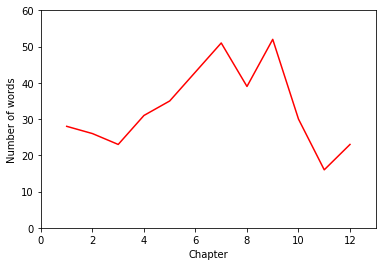

In [94]:
analyze_book('alice_in_wonderland.txt', 'CHAPTER', 'alice')

#### Hint

Du kan bruke funksjonen i oppgave a for å dele opp teksten i kapitler, funksjonen i oppgave b for å finne y-verdiene og funksjonen i oppgave c for å finne x-verdiene.

Det er mulig at du kan få bruk for den innebygde funksjonen `max(liste)` som finner det høyeste tallet i listen.

## e) Flere ord med samme funksjon

Lag funksjonen `analyze_multiple_words(filename, chapter_delimiter, words)`. Her er `words` en liste med ord, og funksjonen skal tegne en graf med `analyze_book` for hvert av ordene i `words`.

***Skriv koden din i kodeblokken under:***

In [ ]:
def analyze_multiple_words(filename, chapter_delimiter, words):
    
    chapters=get_chapters(filename, chapter_delimiter)
    for word in words:
        count=count_words(chapters, word)
        chapterNums=create_numbers_to(len(chapters))
        plt.plot(chapterNums,count,"r-")
    plt.ylabel("Number of words")
    plt.xlabel("Chapter")
    plt.axis([0,13,0,60])
    plt.show()

Du kan teste ut funksjonen din med kodeblokken nedenfor, som altså burde tegne opp 7 grafer:

In [ ]:
words = ["rabbit", "caterpillar", "sister", "cat", "queen", "turtle", "hatter"]
analyze_multiple_words('alice_in_wonderland.txt', 'CHAPTER', words)

## f) Ny bok: Peter Pan (frivillig)

**Denne oppgaven er ikke nødvendig å gjøre for å få øvingen godkjent.**

Funksjonene som vi har definert i tidligere oppgaver er veldig generelle. Sjekk ut filen [peter_pan.txt](peter_pan.txt) og prøv å bruk funksjonene du allerede har definert til å analysere denne. Hint: gå inn i filen og se om du finner en passende `chapter_delimitter`. Peter Pan har 17 kapitler, så dette burde bli en noe større graf.

Du kan finne interessante søkeord på https://en.wikipedia.org/wiki/Characters_of_Peter_Pan

**Obs**: "peter pan"-tekstfilen er lastet ned fra [project gutenberg](https://www.gutenberg.org/), og kom opprinnelig med [denne lisensen](lisens_peter_pan.txt). Dette er ikke noe du trenger å bry deg om hvis du ikke skal redistribuere filen.

***Skriv koden din i kodeblokken under:***